In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

data_dir = "/home/nuttacha/archivenew/asl_alphabet_train/asl_alphabet_train"
IMG_SIZE = (64, 64)
BATCH_SIZE = 16
SEED = 123

# 1. โหลด 80% สำหรับ training
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # จอง 20% ไว้สำหรับ validation+test
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# 2. โหลด 20% ที่เหลือ (ที่ไม่ได้ใช้ใน train_ds)
# เราจะเรียกมันว่า 'temp_ds' ก่อน เพราะต้องแบ่งมันอีกที
temp_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",   # เลือก "validation" เพื่อเอา 20% ที่เหลือ
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# 3. แบ่ง 20% ที่เหลือ (temp_ds) ออกเป็น 10% (val_ds) และ 10% (test_ds)
# หาจำนวน batch ทั้งหมดใน temp_ds (ซึ่งคือ 20% ของข้อมูล)
val_batches = tf.data.experimental.cardinality(temp_ds)
# แบ่งครึ่ง (50% ของ 20% = 10% ของทั้งหมด)
val_ds = temp_ds.take(val_batches // 2)
# เอาส่วนที่เหลืออีกครึ่ง
test_ds = temp_ds.skip(val_batches // 2)


class_names = train_ds.class_names
print("Class names:", class_names)
print("Number of classes:", len(class_names))

# Normalize ค่า pixel [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))  # **อย่าลืม test_ds**

# Optimize dataset pipeline
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)  # **อย่าลืม test_ds**

'''print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test batches:", tf.data.experimental.cardinality(test_ds).numpy())

print(f"Total Train images (Approx.): ~{train_batches * BATCH_SIZE}")
print(f"Total Validation images (Approx.): ~{val_batches * BATCH_SIZE}")
print(f"Total Test images (Approx.): ~{test_batches * BATCH_SIZE}")'''

# 1. คำนวณและ "เก็บค่า" ลงในตัวแปร
train_batches = tf.data.experimental.cardinality(train_ds).numpy()
val_batches = tf.data.experimental.cardinality(val_ds).numpy()
test_batches = tf.data.experimental.cardinality(test_ds).numpy()

# 2. พิมพ์จำนวน Batch (โดยใช้ตัวแปรที่เพิ่งสร้าง)
print("Train batches:", train_batches)
print("Validation batches:", val_batches)
print("Test batches:", test_batches)

print("------------------------------------------")

# 3. พิมพ์จำนวนภาพ (ตอนนี้ตัวแปรมีค่าแล้ว และโค้ดจะไม่ error)
print(f"Total Train images (Approx.): ~{train_batches * BATCH_SIZE}")
print(f"Total Validation images (Approx.): ~{val_batches * BATCH_SIZE}")
print(f"Total Test images (Approx.): ~{test_batches * BATCH_SIZE}")

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
Class names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Number of classes: 29
Train batches: 4350
Validation batches: 544
Test batches: 544
------------------------------------------
Total Train images (Approx.): ~69600
Total Validation images (Approx.): ~8704
Total Test images (Approx.): ~8704


In [1]:
'''import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

data_dir = "/home/nuttacha/archivenew/asl_alphabet_train/asl_alphabet_train"

# โหลด dataset และแบ่ง train / validation
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,     # 80% สำหรับ train
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size= 4
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size= 4
)

class_names = train_ds.class_names
print("Class names:", class_names)
print("Number of classes:", len(class_names))

# Normalize ค่า pixel [0,1] โมเดลเรียนได้ดีขึ้นเมื่อข้อมูลถูก normalized (ค่ากระจายไม่กว้างเกินไป) — ช่วยให้การเรียนรู้ของ optimizer มีเสถียรภาพ
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Optimize dataset pipeline

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Optimize dataset pipeline
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())'''

2025-10-24 13:57:41.165401: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 13:57:46.152840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761289066.413718    4615 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761289066.525125    4615 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761289067.091579    4615 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


I0000 00:00:1761289114.406765    4615 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
Class names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Number of classes: 29
Train batches: 17400
Validation batches: 4350


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 2, 2, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,628,765 (93.95 MB)

 Trainable params: 1,063,965 (4.06 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

Epoch 1/10


2025-10-24 15:02:12.509525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:90: Filling up shuffle buffer (this may take a while): 350 of 1000
2025-10-24 15:01:54.723160: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


4350/4350 ━━━━━━━━━━━━━━━━━━━━ 117s 18ms/step - accuracy: 0.8289 - loss: 0.5732 - val_accuracy: 0.9400 - val_loss: 0.1917
Epoch 2/10
4350/4350 ━━━━━━━━━━━━━━━━━━━━ 58s 16ms/step - accuracy: 0.9240 - loss: 0.2505 - val_accuracy: 0.9583 - val_loss: 0.1303
Epoch 3/10
4350/4350 ━━━━━━━━━━━━━━━━━━━━ 51s 11ms/step - accuracy: 0.9460 - loss: 0.1914 - val_accuracy: 0.9743 - val_loss: 0.0866
Epoch 4/10
4350/4350 ━━━━━━━━━━━━━━━━━━━━ 58s 13ms/step - accuracy: 0.9558 - loss: 0.1634 - val_accuracy: 0.9719 - val_loss: 0.0948
Epoch 5/10
4350/4350 ━━━━━━━━━━━━━━━━━━━━ 53s 12ms/step - accuracy: 0.9608 - loss: 0.1551 - val_accuracy: 0.9790 - val_loss: 0.0759
Epoch 6/10


2025-10-24 15:07:28.124032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:90: Filling up shuffle buffer (this may take a while): 860 of 1000


   7/4350 ━━━━━━━━━━━━━━━━━━━━ 1:51 26ms/step - accuracy: 0.9695 - loss: 0.0732

2025-10-24 15:07:06.806772: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


4350/4350 ━━━━━━━━━━━━━━━━━━━━ 53s 12ms/step - accuracy: 0.9660 - loss: 0.1426 - val_accuracy: 0.9785 - val_loss: 0.0983
Epoch 7/10
4350/4350 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.9696 - loss: 0.1342 - val_accuracy: 0.9798 - val_loss: 0.0748
Epoch 8/10
4350/4350 ━━━━━━━━━━━━━━━━━━━━ 52s 12ms/step - accuracy: 0.9726 - loss: 0.1258 - val_accuracy: 0.9775 - val_loss: 0.1130
Epoch 9/10
4350/4350 ━━━━━━━━━━━━━━━━━━━━ 51s 11ms/step - accuracy: 0.9744 - loss: 0.1236 - val_accuracy: 0.9785 - val_loss: 0.1180
Epoch 10/10
  10/4350 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step - accuracy: 0.9966 - loss: 0.0229

2025-10-24 15:10:53.323934: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:90: Filling up shuffle buffer (this may take a while): 973 of 1000
2025-10-24 15:10:53.355399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


4350/4350 ━━━━━━━━━━━━━━━━━━━━ 52s 7ms/step - accuracy: 0.9757 - loss: 0.1151 - val_accuracy: 0.9827 - val_loss: 0.0698
Epoch 11/15


2025-10-24 15:11:58.441194: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:90: Filling up shuffle buffer (this may take a while): 844 of 1000
2025-10-24 15:11:58.655315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


4350/4350 ━━━━━━━━━━━━━━━━━━━━ 167s 33ms/step - accuracy: 0.6268 - loss: 2.8397 - val_accuracy: 0.8960 - val_loss: 0.3744
Epoch 12/15


2025-10-24 15:14:33.915363: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:90: Filling up shuffle buffer (this may take a while): 463 of 1000


   1/4350 ━━━━━━━━━━━━━━━━━━━━ 5:59:31 5s/step - accuracy: 0.8750 - loss: 0.5239

2025-10-24 15:14:14.949248: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


4350/4350 ━━━━━━━━━━━━━━━━━━━━ 119s 26ms/step - accuracy: 0.8860 - loss: 0.3554 - val_accuracy: 0.9775 - val_loss: 0.0730
Epoch 13/15
   1/4350 ━━━━━━━━━━━━━━━━━━━━ 3:50:24 3s/step - accuracy: 1.0000 - loss: 0.1055

2025-10-24 15:16:34.160916: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:90: Filling up shuffle buffer (this may take a while): 958 of 1000
2025-10-24 15:16:34.261321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


4350/4350 ━━━━━━━━━━━━━━━━━━━━ 126s 28ms/step - accuracy: 0.9531 - loss: 0.1404 - val_accuracy: 0.9924 - val_loss: 0.0249
Epoch 14/15


2025-10-24 15:18:39.341734: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:90: Filling up shuffle buffer (this may take a while): 561 of 1000
2025-10-24 15:18:21.754100: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


4350/4350 ━━━━━━━━━━━━━━━━━━━━ 116s 25ms/step - accuracy: 0.9743 - loss: 0.0759 - val_accuracy: 0.9960 - val_loss: 0.0121
Epoch 15/15


2025-10-24 15:20:34.473631: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] ShuffleDatasetV3:90: Filling up shuffle buffer (this may take a while): 529 of 1000


   3/4350 ━━━━━━━━━━━━━━━━━━━━ 3:40 51ms/step - accuracy: 0.9618 - loss: 0.1301

2025-10-24 15:20:13.621713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:482] Shuffle buffer filled.


4350/4350 ━━━━━━━━━━━━━━━━━━━━ 107s 24ms/step - accuracy: 0.9836 - loss: 0.0488 - val_accuracy: 0.9972 - val_loss: 0.0099


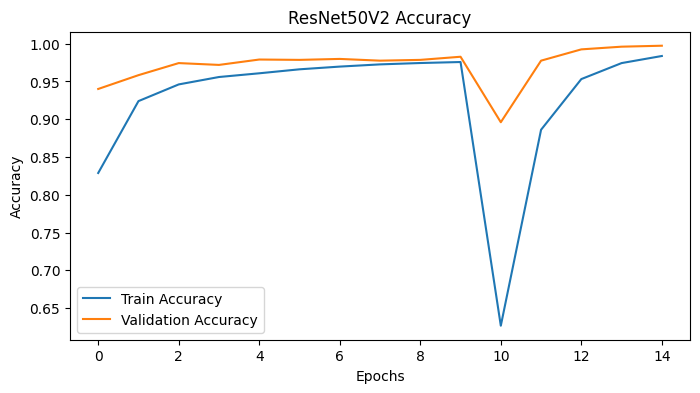

Evaluating model on the Test dataset...
216/544 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.9973 - loss: 0.0065

2025-10-24 15:22:13.380840: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1504', 112 bytes spill stores, 112 bytes spill loads

2025-10-24 15:22:13.498006: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1504', 1056 bytes spill stores, 1056 bytes spill loads

2025-10-24 15:22:14.496141: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1504', 8 bytes spill stores, 8 bytes spill loads

2025-10-24 15:22:14.499072: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1511', 124 bytes spill stores, 124 bytes spill loads

2025-10-24 15:22:14.635210: I exte

544/544 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.9974 - loss: 0.0072 


Final Test Loss: 0.007241670973598957
Final Test Accuracy: 0.9973551034927368
Model saved as resnet50v2_asl_model.h5


In [6]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt


base_model = ResNet50V2(
    include_top=False,        
    weights='imagenet',        
    input_shape=(64, 64, 3)
)


base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')  
])


model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


base_model.trainable = True
fine_tune_at = 140  

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


fine_tune_epochs = 5
total_epochs = 10 + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=10
)


acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']


plt.figure(figsize=(8, 4))
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("ResNet50V2 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 3. (เพิ่มเข้ามา) ประเมินผลโมเดลด้วย Test Set (10%) ที่ไม่เคยเห็นมาก่อน
print("=============================================")
print("Evaluating model on the Test dataset...")
test_loss, test_accuracy = model.evaluate(test_ds) # <--- ใช้ test_ds ที่นี่

print(f"Final Test Loss: {test_loss}")
print(f"Final Test Accuracy: {test_accuracy}")
print("=============================================")


model.save("resnet50v2_asl_model.h5")
print("Model saved as resnet50v2_asl_model.h5")

2025-10-24 16:08:22.886349: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 16:08:23.172377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761296903.287656   10620 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761296903.317478   10620 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761296903.555244   10620 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Loading model from resnet50v2_asl_model.h5...


I0000 00:00:1761296936.041168   10620 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model loaded successfully.
Image preprocessed successfully: /home/nuttacha/archivenew/asl_alphabet_test/asl_alphabet_test/A_test.jpg
Predicting...


I0000 00:00:1761296920.176720   10868 service.cc:152] XLA service 0x737244050280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761296920.177156   10868 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-10-24 16:08:40.390605: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761296921.107143   10868 cuda_dnn.cc:529] Loaded cuDNN version 91002
2025-10-24 16:09:15.911075: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng33{k2=15,k6=0,k13=1,k14=0,k22=0} for conv %cudnn-conv-bias-activation.111 = (f32[1,1024,2,2]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,256,2,2]{3,2,1,0} %bitcast.5633, f32[1024,256,1,1]{3,2,1,0} %bitcast.5640, f32[1024]{0} %bitcast.5642, f32[1,1024,2,2]{3,2,1,0} %bitcast.5647), window={size=1x1}, dim_labels=bf01_oi0

1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step

ผลการทำนาย (Prediction)
Class: A
Confidence: 100.00%


I0000 00:00:1761296937.568939   10868 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


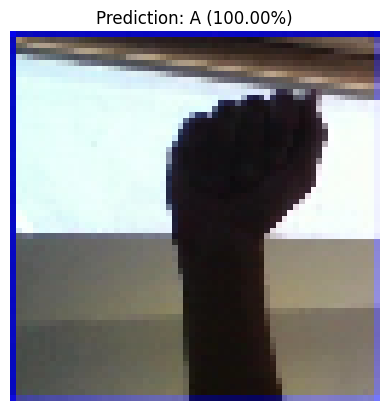

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. ตั้งค่า (ต้องตรงกับตอนเทรนโมเดล)
# ---------------------------------------------------------------------

MODEL_PATH = 'resnet50v2_asl_model.h5'
IMG_SIZE = (64, 64) # ‼️ สำคัญมาก: ต้องเป็น (64, 64) ตามที่คุณใช้เทรน

# ‼️ สำคัญ: คัดลอก Class names (29 classes) ที่ถูกต้องมาจาก Output ตอนเทรน
# (ต้องเรียงลำดับให้ถูกต้องเหมือนเดิม)
CLASS_NAMES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
               'del', 'nothing', 'space']

# ---------------------------------------------------------------------
# 2. โหลดโมเดลที่เทรนไว้
# ---------------------------------------------------------------------
print(f"Loading model from {MODEL_PATH}...")
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit() # ออกจากโปรแกรมถ้าโหลดโมเดลไม่ได้

# ---------------------------------------------------------------------
# 3. เตรียมภาพใหม่
# ---------------------------------------------------------------------

# ‼️‼️ แก้ไขตรงนี้ ‼️‼️
# ใส่ Path ไปยังภาพที่คุณต้องการทดสอบ
IMAGE_PATH = '/home/nuttacha/archivenew/asl_alphabet_test/asl_alphabet_test/A_test.jpg'

try:
    # 3.1 โหลดภาพจากไฟล์ และปรับขนาดให้เป็น (64, 64)
    img = load_img(IMAGE_PATH, target_size=IMG_SIZE)

    # 3.2 แปลงภาพเป็น NumPy array (ขนาด 64, 64, 3)
    img_array = img_to_array(img)

    # 3.3 Normalize ค่าสี (ให้เหมือนตอนเทรน)
    # โมเดลเรียนรู้จากภาพที่ค่าสี 0-1 ไม่ใช่ 0-255
    img_array_normalized = img_array / 255.0

    # 3.4 เพิ่มมิติของ "batch"
    # โมเดลคาดหวังข้อมูลเป็น "กลุ่ม" (Batch)
    # เราจึงแปลง (64, 64, 3) -> (1, 64, 64, 3)
    img_batch = np.expand_dims(img_array_normalized, axis=0) 

    print(f"Image preprocessed successfully: {IMAGE_PATH}")

except FileNotFoundError:
    print(f"Error: Image file not found at {IMAGE_PATH}")
    print("Please update IMAGE_PATH to the correct path of your image.")
    exit()
except Exception as e:
    print(f"Error processing image: {e}")
    exit()

# ---------------------------------------------------------------------
# 4. สั่งให้โมเดลทำนาย (Predict)
# ---------------------------------------------------------------------
print("Predicting...")

# .predict() จะคืนค่า probability (ความน่าจะเป็น) ของทุก Class
predictions = model.predict(img_batch)

# predictions จะมีหน้าตาประมาณนี้ [[0.01, 0.05, 0.92, ...]] (มี 29 ค่า)

# ---------------------------------------------------------------------
# 5. แปลผลลัพธ์
# ---------------------------------------------------------------------

# 1. ดึง array ของ prediction ออกมาจาก batch (เรามีแค่ภาพเดียว)
score = predictions[0]

# 2. หา "ดัชนี" (index) ของ Class ที่มีค่าน่าจะเป็นสูงสุด
predicted_index = np.argmax(score)

# 3. ใช้ดัชนีไปดึง "ชื่อ Class" จากลิสต์
predicted_class = CLASS_NAMES[predicted_index]

# 4. ดึง "ค่าความมั่นใจ" (ค่าน่าจะเป็น)
confidence = 100 * np.max(score)

# 5. แสดงผลลัพธ์
print("\n" + "="*30)
print("ผลการทำนาย (Prediction)")
print(f"Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")
print("="*30)

# (แถม) แสดงภาพที่ใช้ทดสอบ
plt.imshow(img)
plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
plt.axis('off')
plt.show()